In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
# Constants
seq_len = 1000
step = 40
forecast_len = 2

In [3]:
dfo = pd.read_csv(os.path.join('21_coins_tot.csv'), index_col = 0)

In [23]:
dfref = pd.read_csv(os.path.join('21coins_ref2.csv'), index_col = 0)

In [7]:
rows = seq_len*len(dfo.index)
cols = int(dfo.shape[1]/seq_len)
df = dfo.iloc[:,:seq_len*cols].values.reshape((rows, cols), order = 'F')
one_pass = df.shape[1]

In [8]:
for i in range(1, int(seq_len/step)):
    dftemp = dfo.iloc[:,i*step:]
    rows = seq_len*len(dftemp.index)
    cols = int(dftemp.shape[1]/seq_len)
    temp = dftemp.iloc[:, :seq_len*cols].values.reshape((rows, cols), order = 'F')
    df = np.concatenate((df, temp), axis = 1)

In [9]:
df.shape

(189000, 8708)

In [24]:
rows = seq_len*len(dfref.index)
cols = int(dfref.shape[1]/seq_len)
ref = dfref.iloc[:,:seq_len*cols].values.reshape((rows, cols), order = 'F')

In [25]:
ref.shape

(189000, 20)

In [12]:
percentages = [.4, .3, .2, .1,.0]
def find_results(ref, df, dfo, percentages, amount, forecast_len):
    num_passes = ref.shape[1]
    am = []
    cors = []
    for index, col in enumerate(ref.T):
        print("This is pass " + str(index+1) + " of " + str(num_passes))
        correls = [np.corrcoef(df[:,a], col)[1,0] for a in range(df.shape[1])]
        max_corr = np.argmax(correls)
        cor = max(correls)
        print(cor)
        cors.append(cor)
        place = int(max_corr/one_pass)
        shift = max_corr % one_pass
        origin = place*seq_len + shift
        target = index
        results = pd.concat([dfo.iloc[3::9, [origin, origin+forecast_len]], 
                     dfref.iloc[3::9, [target, target+forecast_len]]], axis = 1)
        dif1 = results.iloc[:, :2].pct_change(axis = "columns")
        dif2 = results.iloc[:, 2:].pct_change(axis = "columns")
        results['dif1'] = dif1.iloc[:,1]
        results['dif2'] = dif2.iloc[:,1]
        results = results.sort_values(['dif1'], ascending = False)
        for i, per in enumerate(percentages):
            amount += amount * per * results['dif2'][i]
        am.append(amount)
    
    return amount, am, cors

In [26]:
amount = 100
total_amount, partial_amounts, cors = find_results(ref, df, dfo, percentages, amount, forecast_len)

This is pass 1 of 20
0.3605653216073607
This is pass 2 of 20
0.28410998818791616
This is pass 3 of 20
0.4171591783318265
This is pass 4 of 20
0.347535172785306
This is pass 5 of 20
0.2750248648576311
This is pass 6 of 20
0.3125905377651117
This is pass 7 of 20
0.4701706469134972
This is pass 8 of 20
0.5263608242056246
This is pass 9 of 20
0.4377212633552753
This is pass 10 of 20
0.4317228732681853
This is pass 11 of 20
0.353157829632141
This is pass 12 of 20
0.3854402164558553
This is pass 13 of 20
0.2955358662217207
This is pass 14 of 20
0.33010113043104566
This is pass 15 of 20
0.40074981409676685
This is pass 16 of 20
0.28436895511378313
This is pass 17 of 20
0.3161169641157887
This is pass 18 of 20
0.41801048709009186
This is pass 19 of 20
0.2970016904315824
This is pass 20 of 20
0.3382566511822137


In [27]:
total_amount

98.48590902136489

In [16]:
import matplotlib.pyplot as plt

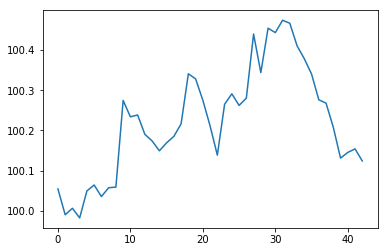

In [17]:
plt.plot(partial_amounts)

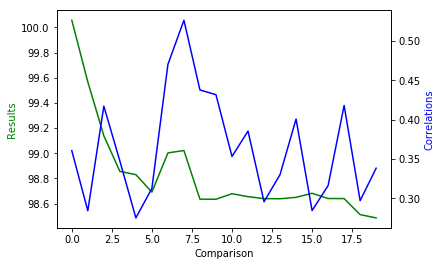

In [28]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(partial_amounts, 'g-')
ax2.plot(cors, 'b-')

ax1.set_xlabel('Comparison')
ax1.set_ylabel('Results', color='g')
ax2.set_ylabel('Correlations', color='b')

plt.show()

In [ ]:
plt.plot(dfref.loc['ETH.p'])

In [33]:
list(dfref.index)

['ADA.h',
 'ADA.l',
 'ADA.o',
 'ADA.p',
 'ADA.qv',
 'ADA.t',
 'ADA.tbv',
 'ADA.tqv',
 'ADA.v',
 'BAT.h',
 'BAT.l',
 'BAT.o',
 'BAT.p',
 'BAT.qv',
 'BAT.t',
 'BAT.tbv',
 'BAT.tqv',
 'BAT.v',
 'BNB.h',
 'BNB.l',
 'BNB.o',
 'BNB.p',
 'BNB.qv',
 'BNB.t',
 'BNB.tbv',
 'BNB.tqv',
 'BNB.v',
 'DASH.h',
 'DASH.l',
 'DASH.o',
 'DASH.p',
 'DASH.qv',
 'DASH.t',
 'DASH.tbv',
 'DASH.tqv',
 'DASH.v',
 'EOS.h',
 'EOS.l',
 'EOS.o',
 'EOS.p',
 'EOS.qv',
 'EOS.t',
 'EOS.tbv',
 'EOS.tqv',
 'EOS.v',
 'ETC.h',
 'ETC.l',
 'ETC.o',
 'ETC.p',
 'ETC.qv',
 'ETC.t',
 'ETC.tbv',
 'ETC.tqv',
 'ETC.v',
 'ETH.h',
 'ETH.l',
 'ETH.o',
 'ETH.p',
 'ETH.qv',
 'ETH.t',
 'ETH.tbv',
 'ETH.tqv',
 'ETH.v',
 'IOTA.h',
 'IOTA.l',
 'IOTA.o',
 'IOTA.p',
 'IOTA.qv',
 'IOTA.t',
 'IOTA.tbv',
 'IOTA.tqv',
 'IOTA.v',
 'LTC.h',
 'LTC.l',
 'LTC.o',
 'LTC.p',
 'LTC.qv',
 'LTC.t',
 'LTC.tbv',
 'LTC.tqv',
 'LTC.v',
 'NEO.h',
 'NEO.l',
 'NEO.o',
 'NEO.p',
 'NEO.qv',
 'NEO.t',
 'NEO.tbv',
 'NEO.tqv',
 'NEO.v',
 'OMG.h',
 'OMG.l',
 'OMG.o',
 '